<a href="https://colab.research.google.com/github/dtsitsos/Probability_Statistics_Project/blob/main/Probability_Statistics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projet Master HPC-IA Mines Paris
        2022 - 2023**

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.special import polygamma

**Problem 1**



$$ P(X) = f(a,b)(x) = \frac{b^a}{\Gamma(a)} \ x^{(a-1)} \ e^{(-bx)} $$

$$ L(a,b) = ? $$


$$ L(x;a,b) = \prod \limits _{i=1} ^{n} f_{(a,b)}(x_i) = \prod \limits _{i=1} ^{n} \frac{b^a}{Γ(a)}x_i^{(a-1)}e^{(-bx_i)} = \frac{b^a}{Γ(a)} \prod \limits _{i=1} ^{n}x_i^{(a-1)}e^{(-bx_i)}
$$

$$
L(a,b) = naln(b) - nln(Γ(a)) -b\sum \limits _{i=1} ^{n} x_i + (a-1) \sum \limits _{i=1} ^{n} ln(x_i)
$$


In [ ]:
a, b = 2, 2
n = 20
x = np.random.gamma(a, 1/b, n)
x

array([1.03170264, 1.40493351, 1.10145458, 0.43845487, 0.69344093,
       0.32313799, 2.41916316, 1.25383447, 0.84712156, 2.49066415,
       0.9966411 , 2.24266437, 0.49341604, 1.50485495, 0.81853175,
       1.52326167, 0.60058229, 0.7452051 , 0.52200794, 3.38449345])

In [ ]:
def log_likelihood(a,b,x):
    return len(x)*a*math.log(b)-len(x)*math.log(math.gamma(a))-b*np.sum(x)+(a-1)*np.sum(np.log(x)) #check with the demonstration in q1

print(log_likelihood(a,b,x))

-21.449025565153242


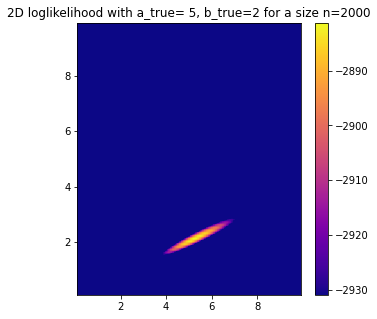

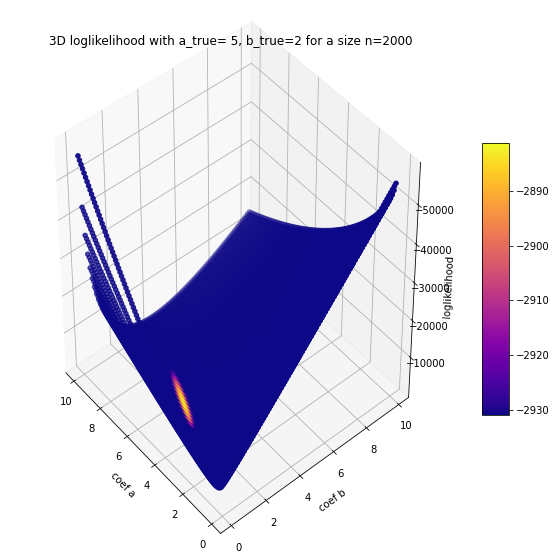

In [ ]:
a, b = 5, 2
n = 2000
x = np.random.gamma(a, 1/b, n)

def plot_2_3d(x, a, b):
    A =np.arange(0.1, 10, 0.1)
    B = np.arange(0.1, 10, 0.1)
    #Computing the value of the log-likelihood function for the mesh of a, b
    aa, bb = np.meshgrid(A,B)
    ll = np.zeros(aa.shape)
    for i in range(aa.shape[0]):
        for j in range(aa.shape[1]):
            ll[i, j] = log_likelihood(aa[i,j],bb[i,j],x)
    #2D plot
    fig = plt.figure(figsize = (5, 5))
    plt.imshow(ll.reshape(aa.shape),
               origin='lower', aspect='auto',
               extent=[min(A), max(A), min(B), max(B)],
               cmap='plasma', vmin = np.max(ll)+np.max(ll)/58, vmax = np.max(ll))
    cb = plt.colorbar()
    plt.title('2D loglikelihood with a_true= {}, b_true={} for a size n={}'.format(a, b, len(x)))
    fig.show()
    #3D plot
    fig = plt.figure(figsize = (10, 10))
    ax = plt.axes(projection='3d')
    plot = ax.scatter3D(aa, bb, ll, c=ll.reshape(aa.shape), cmap='plasma', vmin = np.max(ll)+np.max(ll)/58, vmax = np.max(ll));
    ax.set_xlabel('coef a')
    ax.set_ylabel('coef b')
    ax.set_zlabel('loglikelihood')
    ax.view_init(-140, 40)
    fig.colorbar(plot, ax = ax, shrink = 0.5, aspect = 10)
    plt.title('3D loglikelihood with a_true= {}, b_true={} for a size n={}'.format(a, b, len(x)))
    fig.show()
    
plot_2_3d(x, a, b)

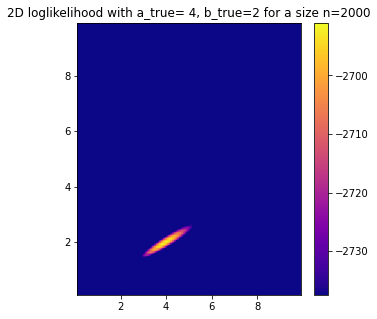

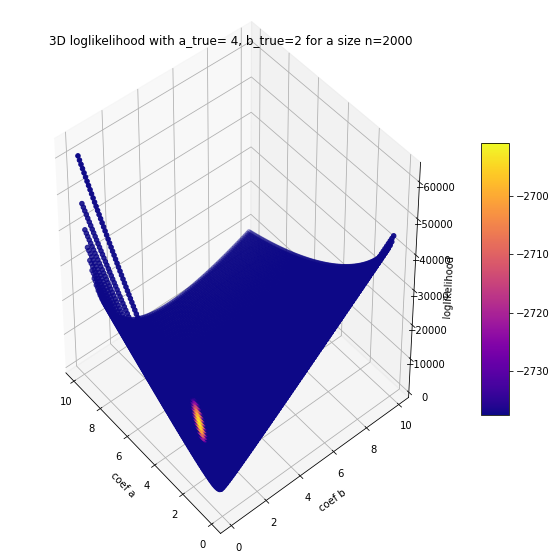

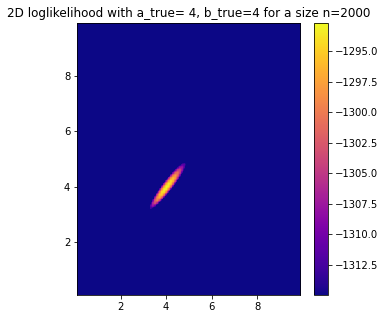

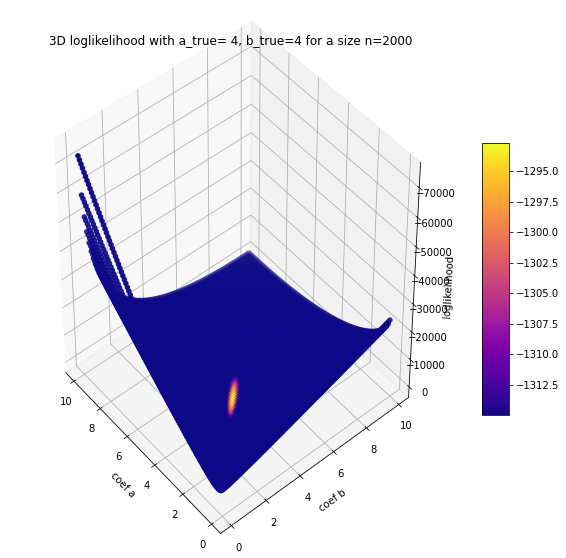

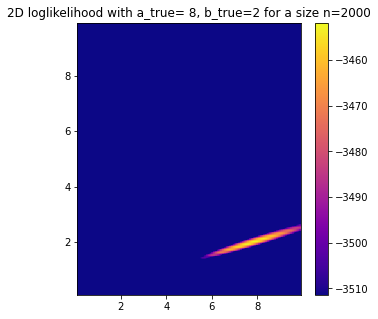

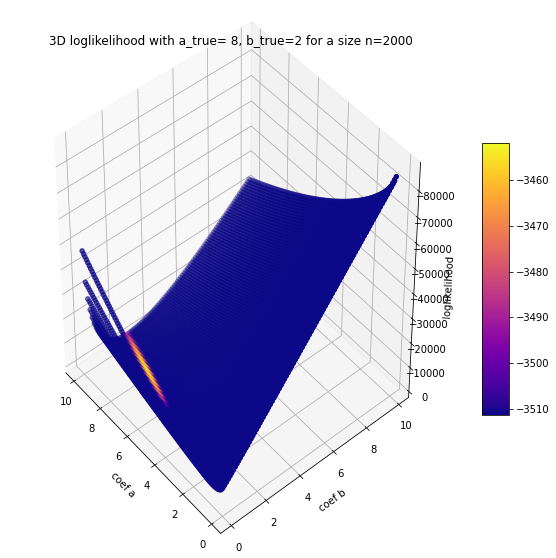

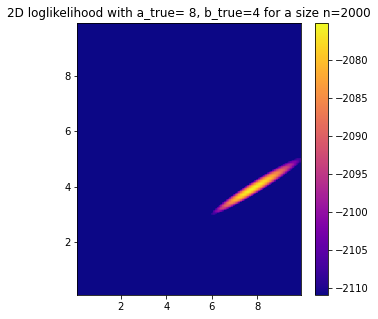

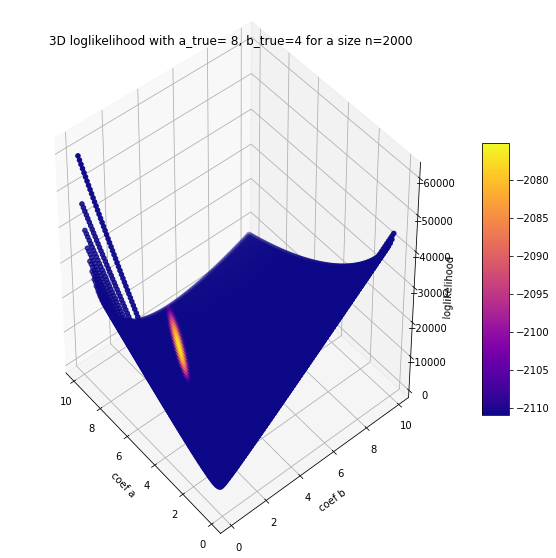

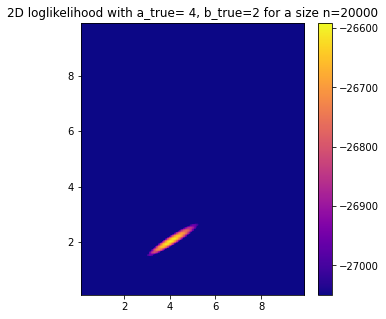

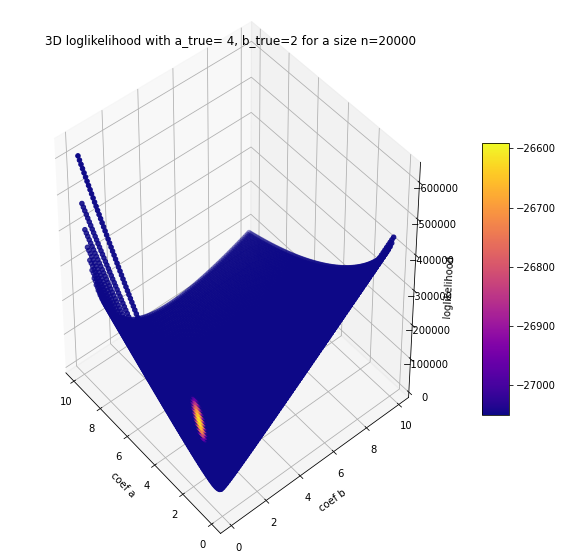

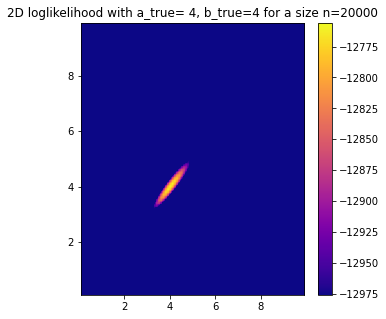

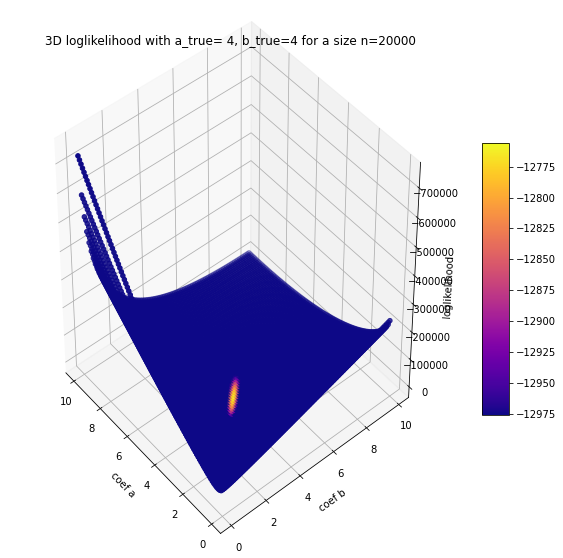

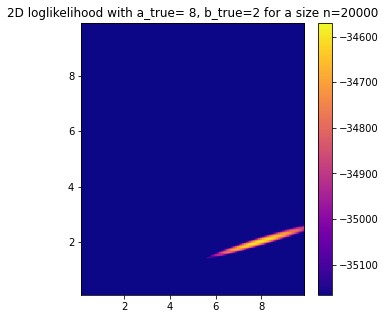

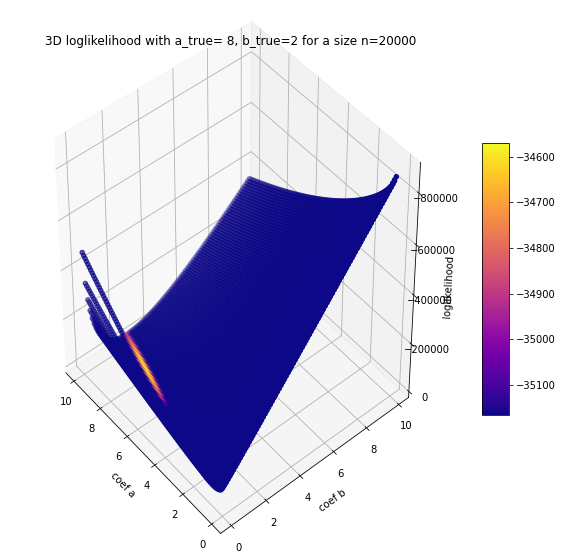

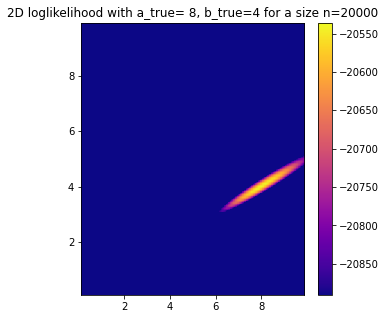

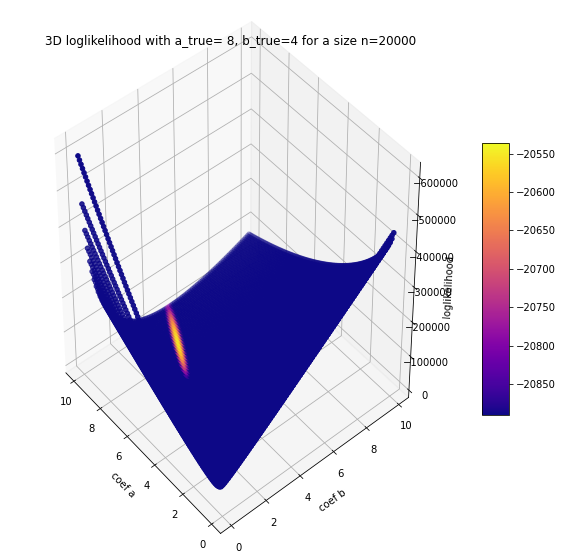

In [ ]:
N = [2000, 20000]
A = [4, 8]
B = [2, 4]
for i in N:
  for j in A:
    for k in B:
      x = np.random.gamma(j, 1/k, i)
      plot_2_3d(x, j, k)


$$
\nabla l(a,b) = (\frac{\delta}{\delta a}l(a,b),\frac{\delta}{\delta b}l(a,b))^T
$$



> $$ \frac{\delta}{\delta a}L(a,b) = nln(b) - nln(Γ(a))' + \sum \limits _{i=1} ^{n} ln(x_i)$$


> $$ \frac{\delta}{\delta b}L(a,b) = \frac{na}{b} -\sum \limits _{i=1} ^{n} x_i $$

$$
H(a,b)^{-1} =  \left(\begin{matrix} \frac{\delta^2}{\delta^2 a}l(a,b) & \frac{\delta^2}{\delta a \delta b}l(a,b) 
                                    \\ \frac{\delta^2}{\delta a \delta b}l(a,b) & \frac{\delta^2}{\delta^2 b}l(a,b)\end{matrix} \right)^{-1}
$$

$$\frac{\delta^2}{\delta^2 a}l(a,b)=-nln(Γ(a))''$$
$$\frac{\delta^2}{\delta a \delta b}l(a,b)=\frac{n}{b}$$ 
$$\frac{\delta^2}{\delta^2 b}l(a,b)=-\frac{na}{b^2}$$
$$det=-\frac{n^2(1-ln(Γ(a))'')}{b^2}$$

$$
H(a,b)^{-1} = -\frac{b^2}{n^2(1-a(lnΓ(a))'')}  \left(\begin{matrix} -\frac{na}{b^2} & -\frac{n}{b} 
                                    \\ -\frac{n}{b} & -nln(Γ(a))''\end{matrix} \right)
$$
$$
H(a,b)^{-1} = \frac{1}{n(1-a(lnΓ(a))'')}  \left(\begin{matrix} a & b
                                    \\ b & b^2ln(Γ(a))''\end{matrix} \right)
$$


In [ ]:
a, b = 2, 2
n = 20
x = np.random.gamma(a, 1/b, n)

def UpdateNewton(x, a, b):
  ab = np.array([[a],[b]])
  sum_log = 0
  grad = np.array([[len(x)*math.log(b) - len(x)*(polygamma(0,a)) + np.sum(np.log(x))], [((len(x)*a)/b) - np.sum(x) ]]) 
  hessian_coef = 1/(len(x)*(1 - a*(polygamma(1, a))))
  hessian = np.array([[hessian_coef*a, hessian_coef*b],
                     [hessian_coef*b, hessian_coef * ((b**2)*polygamma(1, a))]])
  result = np.zeros((2,1))
  result = ab - hessian @ grad
  return result[0,0], result[1,0]
 
UpdateNewton(x, a, b)

(2.6059544276593236, 2.7294898803913448)

In [ ]:
def MLEgamma(x, a0, b0):
  iter = 1
  a_newton, b_newton = UpdateNewton(x, a0, b0)
  if ((a_newton < 0) or  (b_newton < 0)):
    print('negative value')
    return
  while (abs((log_likelihood(a_newton,b_newton,x) - log_likelihood(a0,b0,x)) / log_likelihood(a_newton,b_newton,x)) > 0.001):
    if (iter >= 100):
      return a_newton, b_newton
    else:
      a0 = a_newton
      b0 = b_newton
      a_newton, b_newton = UpdateNewton(x, a0, b0)
      if ((a_newton < 0) or  (b_newton < 0)):
        print('negative value')
        return
      iter = iter+1
  return [a_newton, b_newton, iter]

def print_result_lme(result):
  print('a_hat =',result[0],' and b_hat =',result[1],'with nb of iteration :',result[2])

In [ ]:
a, b = 2, 2
n = 2000
x = np.random.gamma(a, 1/b, n)

result = MLEgamma(x,a,b)
print_result_lme(result)

a_hat = 1.9426107289934047  and b_hat = 1.9217064982063528 with nb of iteration : 1


In [ ]:
a, b = 5, 4
n = 2000
x = np.random.gamma(a, 1/b, n)
print('a_true =',a,' and b_true =',b)
print('a0 = 2 and b0 = 2')
result = MLEgamma(x,2,2)
print_result_lme(result)
print('a0 = 2 and b0 = 2')
result = MLEgamma(x,1,1)
print_result_lme(result)
print('a0 = 1 and b0 = 1')
result = MLEgamma(x,0.25,0.25)
print_result_lme(result)
print('a0 = 0.01 and b0 = 0.01')
result = MLEgamma(x,0.01,0.01)
print_result_lme(result)
print('a0 = 0.01 and b0 = 0.01')
result = MLEgamma(x,0.0001,0.0001)
print_result_lme(result)

a_true = 5  and b_true = 4
a0 = 2 and b0 = 2
a_hat = 4.9788003762985715  and b_hat = 3.908935504873119 with nb of iteration : 4
a0 = 2 and b0 = 2
a_hat = 4.973521428021889  and b_hat = 3.904820098115128 with nb of iteration : 5
a0 = 1 and b0 = 1
a_hat = 4.984010697315969  and b_hat = 3.912872326279453 with nb of iteration : 8
a0 = 0.01 and b0 = 0.01
a_hat = 4.984096123330059  and b_hat = 3.912938738937324 with nb of iteration : 13
a0 = 0.01 and b0 = 0.01
a_hat = 4.977806312333816  and b_hat = 3.9080006977208206 with nb of iteration : 19




$$ E(X) = \frac{a}{b}  = \frac{1}{n} \sum \limits _{i=1} ^{n} x_{i} = \overline{X}$$
$$E(X^2) = \frac{a (a+1)}{b^2} = \frac{1}{n} \sum \limits _{i=1} ^{n} x_{i}^2$$

(1) $$ a = b \overline{X} $$

(2) $$ \frac{b \overline{X} (b \overline{X} + 1)}{b^2} = \frac{1}{n} \sum \limits _{i=1} ^{n} x_{i}^2 $$



(2) $$\hat{b} = \frac{\overline{X_n}}{ \frac{1}{n} \sum \limits _{i=1} ^{n} (x_{i} - \overline{X_n})^2 } $$

(1) $$ \hat{a} = b \overline{X}  =  \frac{\overline{X_n}^2}{ \frac{1}{n} \sum \limits _{i=1} ^{n} (x_{i} - \overline{X_n})^2 }$$


In [ ]:
def sig2(x):
  x_m = np.mean(x)
  a = 0
  for i in range(len(x)):
    a = a + x[i]**2 - x_m**2
  return a/len(x)

def MMEgamma(x):
  sigma2 = sig2(x)
  b_hat = np.mean(x)/sigma2
  a_hat = np.mean(x)**2/sigma2
  return a_hat, b_hat

a, b = 2, 2
n = 2000
x = np.random.gamma(a, 1/b, n)
a_hat, b_hat = MMEgamma(x)
print(a_hat)
print(b_hat)

1.989575850586817
1.9942355373350518


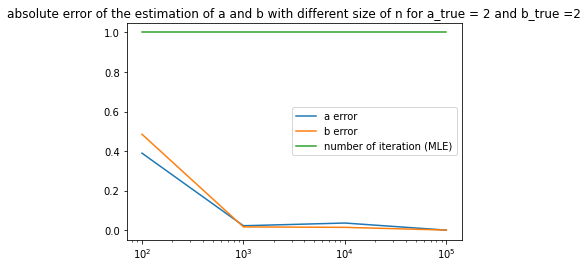

In [ ]:
a, b = 2, 2
n = 20000
iter = []
a_list = []
b_list = []
coord = []
for i in range(2,6):
  x = np.random.gamma(a, 1/b, 10**i)
  coord.append(10**i)
  a_hat, b_hat = MMEgamma(x)
  result = MLEgamma(x,a_hat,b_hat)
  iter.append(result[2])
  a_list.append(abs(a-result[0]))
  b_list.append(abs(b-result[1]))

plt.plot(coord, a_list, label='a error')
plt.plot(coord, b_list, label='b error')
plt.plot(coord, iter, label='number of iteration (MLE)')
plt.xscale('log')
plt.title('absolute error of the estimation of a and b with different size of n for a_true = 2 and b_true =2')
plt.legend()
plt.show()

In [ ]:
import random

def gamma_mme_mle(iteration, n):
    a_l = []
    a_mme = []
    a_mle = []
    b_l = []
    b_mme = []
    b_mle = []
    for i in range(iteration):
        a = round(random.uniform(0.5, 10), 1)
        b = round(random.uniform(0.5, 10), 1)
        x = np.random.gamma(a, 1/b, n)
        a_hat_MME, b_hat_MME = MMEgamma(x)
        result = MLEgamma(x,a_hat_MME,b_hat_MME)
        a_l.append(a)
        a_mme.append(a_hat_MME)
        a_mle.append(result[0])
        b_l.append(b)
        b_mme.append(b_hat_MME)
        b_mle.append(result[1])
    return [a_l, a_mme, a_mle, b_l, b_mme, b_mle]

def quadratic_risk(true_v, mle_v, mme_v):
    risk_mme = 0
    risk_mle = 0
    for i in range(len(true_v)):
        risk_mme = risk_mme + ((mme_v[i] - true_v[i])**2)
        risk_mle = risk_mle + ((mle_v[i] - true_v[i])**2)
    return [risk_mme/len(true_v), risk_mle/len(true_v)]

n = 10000
test = gamma_mme_mle(50, n)
risk_a = quadratic_risk(test[0], test[1], test[2])
risk_b = quadratic_risk(test[3], test[4], test[5])

print('quadratic risk MME for a :', risk_a[0],'for b :', risk_b[0])
print('quadratic risk MLE for a :', risk_a[1], 'for b :', risk_b[1])

quadratic risk MME for a : 0.009874674055979553 for b : 0.011597847964319707
quadratic risk MLE for a : 0.009870411839502862 for b : 0.013397908731281091


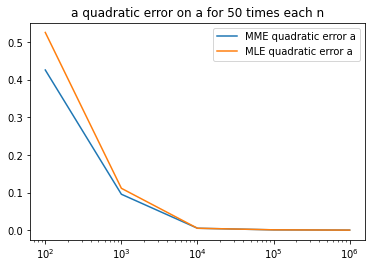

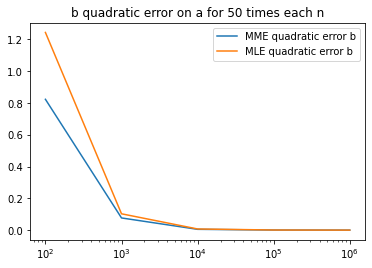

In [ ]:
risk_a_mme = []
risk_a_mle = []
risk_b_mme = []
risk_b_mle = []
n_list = []

for i in range(2,7):
    test = gamma_mme_mle(50, 10**i)
    risk_a = quadratic_risk(test[0], test[1], test[2])
    risk_b = quadratic_risk(test[3], test[4], test[5])
    n_list.append(10**i)
    risk_a_mme.append(risk_a[0])
    risk_a_mle.append(risk_a[1])
    risk_b_mme.append(risk_b[0])
    risk_b_mle.append(risk_b[1])

plt.plot(n_list, risk_a_mme, label='MME quadratic error a')
plt.plot(n_list, risk_a_mle, label='MLE quadratic error a')
plt.xscale('log')
plt.title('a quadratic error on a for 50 times each n')
plt.legend()
plt.show()

plt.plot(n_list, risk_b_mme, label='MME quadratic error b')
plt.plot(n_list, risk_b_mle, label='MLE quadratic error b')
plt.xscale('log')
plt.title('b quadratic error on a for 50 times each n')
plt.legend()
plt.show()

**Problem 2**



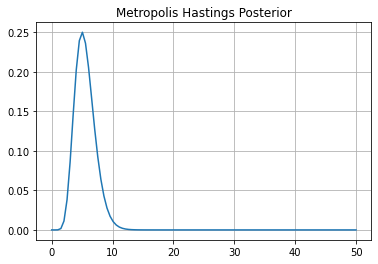

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats

#----------------------------------------------------------------------------------------#
# Define posterior distribution
k, lamb = 1, 1
def posterior(x, k, theta):
      return stats.gamma(k, scale=theta, loc=0).pdf(x)

#----------------------------------------------------------------------------------------#
# Define a wrapper function containing both the likelihood and the prior as a product
def posterior_estim(x, k, lamb):
    prior = stats.gamma(k, scale=1/lamb, loc=0).pdf(x)
    return stats.poisson.pmf(10, x) * prior 

#----------------------------------------------------------------------------------------#
# Plot Posterior

x_array = np.linspace(0, 50, 100)
y_array = np.asarray( [posterior(x, k+10, 1/(lamb+1)) for x in x_array] )

plt.plot(x_array,y_array)
plt.grid()
plt.title('Metropolis Hastings Posterior')
plt.show()
plt.close()


In [ ]:
#----------------------------------------------------------------------------------------#
# Metropolis Hastings sampling from the posterior distribution

N = 100000
s = 10
x = 0
p = posterior_estim(x, k, lamb)
samples = []

for i in range(N):
    xn = x + np.random.normal(size=1)
    pn = posterior_estim(xn,k,lamb)
    if pn >= p:
        p = pn
        x = xn
    else:
        u = np.random.rand()
        if u < pn/p:
            p = pn
            x = xn
    if i % s == 0:
        samples.append(float(x))

samples = np.array(samples)
samples = samples[int(len(samples)/2):]

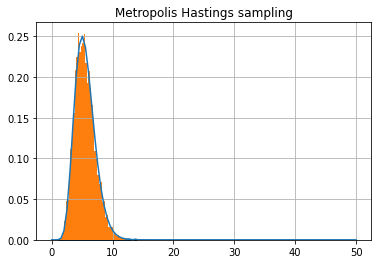

In [ ]:
#----------------------------------------------------------------------------------------#
# Plot Samples

plt.scatter(samples, np.zeros_like(samples), s=10)
plt.plot(x_array,y_array)
plt.hist(samples, bins=50, density=True)
plt.title('Metropolis Hastings sampling')
plt.grid()
plt.show()
plt.close()

Q2:

In [ ]:
#----------------------------------------------------------------------------------------#
# Gaussian kernel
samples = samples.reshape(-1, 1)
create_kde = lambda bw: KernelDensity(kernel="gaussian", bandwidth=bw).fit(samples)
bandwidths = (0.5, 1, 0.1)
x_trunc = x_array[:, np.newaxis]

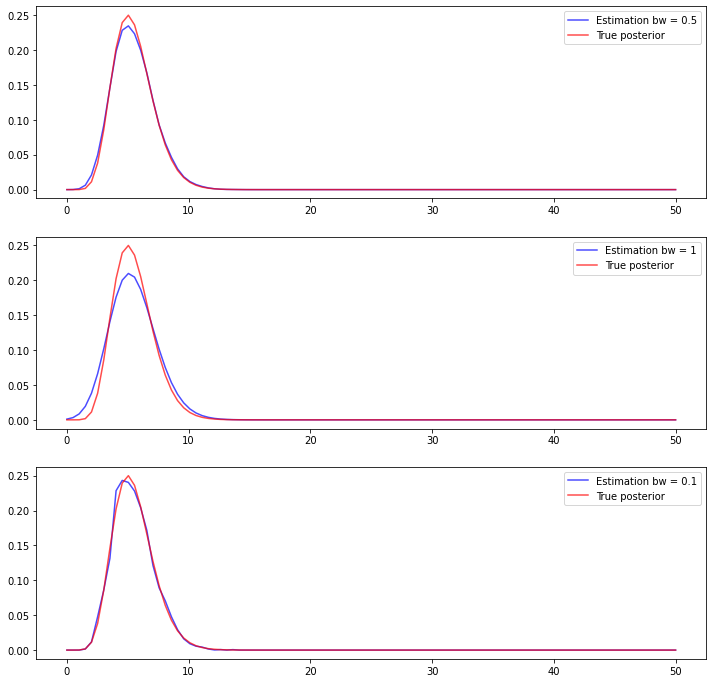

In [ ]:
from sklearn.neighbors import KernelDensity
kdes = [create_kde(bw) for bw in bandwidths]
densities = [np.exp(kde.score_samples(x_trunc)) for kde in kdes]

fig, axs = plt.subplots(3, 1, figsize=(12, 12))
for i, density in enumerate(densities):
    axs[i].plot(x_array, density, "b", alpha=0.7, label=f"Estimation bw = {bandwidths[i]}")
    axs[i].plot(x_array, y_array, "r", alpha=0.7, label="True posterior")
    axs[i].legend()
plt.show()


In [ ]:
#----------------------------------------------------------------------------------------#
# Epanechikov kernel
samples = samples.reshape(-1, 1)
create_kde = lambda bw: KernelDensity(kernel="epanechnikov", bandwidth=bw).fit(samples)
bandwidths = (0.5, 1, 0.1)
x_trunc = x_array[:, np.newaxis]

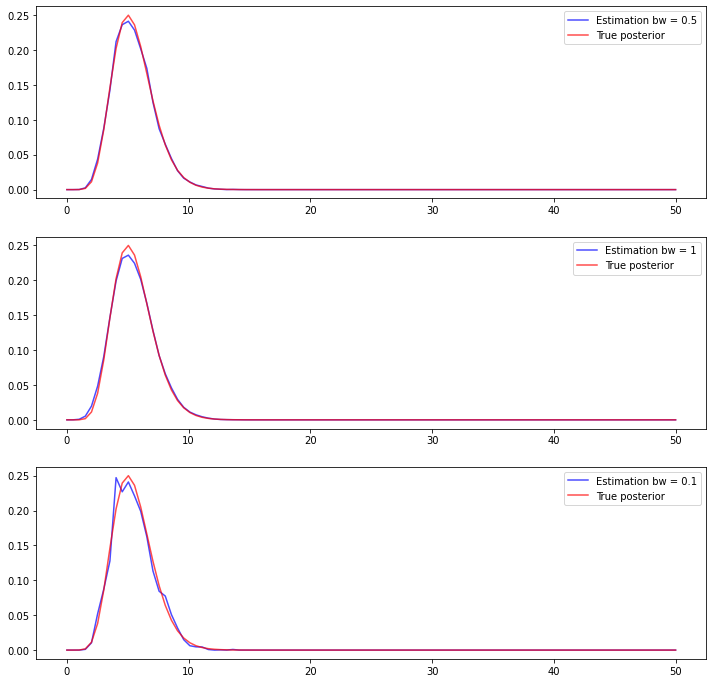

In [ ]:
from sklearn.neighbors import KernelDensity
kdes = [create_kde(bw) for bw in bandwidths]
densities = [np.exp(kde.score_samples(x_trunc)) for kde in kdes]

fig, axs = plt.subplots(3, 1, figsize=(12, 12))
for i, density in enumerate(densities):
    axs[i].plot(x_array, density, "b", alpha=0.7, label=f"Estimation bw = {bandwidths[i]}")
    axs[i].plot(x_array, y_array, "r", alpha=0.7, label="True posterior")
    axs[i].legend()
plt.show()

In [ ]:
#----------------------------------------------------------------------------------------#
# Linear kernel
samples = samples.reshape(-1, 1)
create_kde = lambda bw: KernelDensity(kernel="linear", bandwidth=bw).fit(samples)
bandwidths = (0.5, 1, 0.1)
x_trunc = x_array[:, np.newaxis]

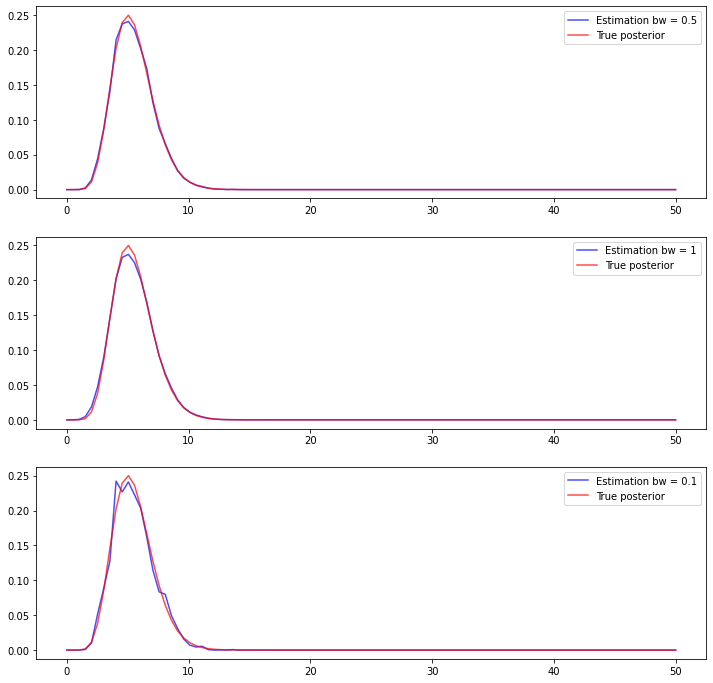

In [ ]:
from sklearn.neighbors import KernelDensity
kdes = [create_kde(bw) for bw in bandwidths]
densities = [np.exp(kde.score_samples(x_trunc)) for kde in kdes]

fig, axs = plt.subplots(3, 1, figsize=(12, 12))
for i, density in enumerate(densities):
    axs[i].plot(x_array, density, "b", alpha=0.7, label=f"Estimation bw = {bandwidths[i]}")
    axs[i].plot(x_array, y_array, "r", alpha=0.7, label="True posterior")
    axs[i].legend()
plt.show()

Problem 3

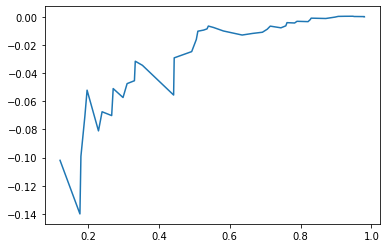

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.linalg

n=50

x = np.random.uniform(0,1,n)
x = np.sort(x,axis=None)

def k(x,y,lambda_):
  return ((1 + ( abs(x-y)/lambda_ ) + (( (abs(x-y))**2)/(3*lambda_**2))  ) * math.exp(-abs(x-y)/lambda_))

def k_matrix(x,lambda_):
  k_arr = np.zeros((x.size,x.size))
  for i in range(x.size):
    for j in range(x.size):
      k_arr[i, j] = k(x[i], x[j], lambda_)
  return k_arr

def plot_z(n, lambda_, N, lab):
  for i in range(N):
    x = np.random.uniform(0,1,n)
    x = np.sort(x,axis=None)
    km = k_matrix(x, lambda_)
    L = np.linalg.cholesky(km)
    g = np.random.normal(0, 1, n)
    Z = L.T @ g
    plt.plot(x[int(n*0.1):],Z[int(n*0.1):], label = lab)
 

plot_z(n,1,1,"")
plt.show()

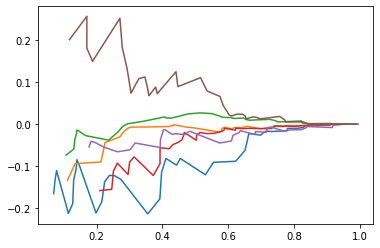

In [ ]:
plot_z(n,1,6,"")
plt.show()

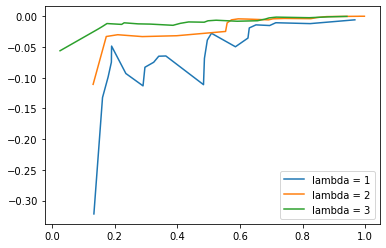

In [ ]:
n = 25
plot_z(n,1,1, "lambda = 1")
plot_z(n,2,1, "lambda = 2")
plot_z(n,3,1, "lambda = 3")
plt.legend()
plt.show()

2

In [ ]:
N = 10
n = 25
x = []
for i in range(N):
  X = np.random.uniform(i/10,(i+1)/10,n)
  x.append(np.sort(X,axis=None))

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.linalg
from scipy.optimize import minimize_scalar


def k(x,y,lambda_):
  return ((1 + ( abs(x-y)/lambda_ ) + (( (abs(x-y))**2)/(3*lambda_**2))  ) * math.exp(-abs(x-y)/lambda_))

def k_matrix(x,lambda_):
  k_arr = np.zeros((x.size,x.size))
  for i in range(x.size):
    for j in range(x.size):
      k_arr[i, j] = k(x[i], x[j], lambda_)
  return k_arr

def neg_log_likelihood(lambda_, x, z, n):
    cov = k_matrix(x, lambda_)
    logdetcov = np.linalg.slogdet(cov)[1] # computes the log 
    invcov = np.linalg.inv(cov)
    return 0.5 * (n * np.log(2 * math.pi) + logdetcov + z.T @ invcov @ z)

x = np.array([np.random.uniform(i / n, (i + 1) / n) for i in range(n)])
z = x
for i in range(x.size):
  z[i] = math.sin(4*math.pi*x[i])


min_lambda = minimize_scalar(neg_log_likelihood, args=(x, z, n))
min_lambda




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


     fun: -128.08148661522344
    nfev: 30
     nit: 25
 success: True
       x: 3.597513934150737

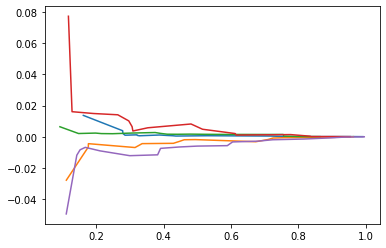

In [ ]:
def plot_z(n, lambda_, N, lab):
  for i in range(N):
    x = np.random.uniform(0,1,n)
    x = np.sort(x,axis=None)
    km = k_matrix(x, lambda_)
    L = np.linalg.cholesky(km)
    g = np.random.normal(0, 1, n)
    Z = L.T @ g
    plt.plot(x[int(n*0.1):],Z[int(n*0.1):], label = lab)
  
plot_z(20,3.6,5,"")
plt.show()